['../logs/ASAM/ResNet18/CIFAR10/Hessian/0.1/42/0.99/20250220213019/test/final_weight', '../logs/ASAM/ResNet18/CIFAR10/HessianParam/0.1/42/0.99/20250220212320/test/final_weight', '../logs/ASAM/ResNet18/CIFAR10/L1/0.1/42/0.99/20250220191053/test/final_weight', '/home/ueno/pruning/test/logs/ASAM/ResNet18/CIFAR10/None/0.1/42/0.0/20250219102225/test/final_weight']
{'clean': [89.08, 93.33, 47.94, 96.37], 'brightness': [87.666, 92.028, 46.184, 95.218], 'contrast': [66.236, 72.808, 25.584, 80.274], 'defocus_blur': [79.184, 79.64, 33.666, 86.88], 'elastic_transform': [78.83, 83.16, 36.476, 88.546], 'fog': [81.29, 85.75, 32.682, 90.59], 'frost': [70.106, 74.45, 37.07, 82.802], 'gaussian_blur': [72.374, 67.746, 29.596, 78.408], 'gaussian_noise': [36.642, 36.468, 24.36, 50.522], 'glass_blur': [44.882, 53.584, 29.408, 59.412], 'impulse_noise': [51.724, 48.42, 26.34, 59.436], 'jpeg_compression': [74.252, 78.556, 42.992, 84.004], 'motion_blur': [73.244, 75.128, 27.722, 83.572], 'pixelate': [65.39, 69

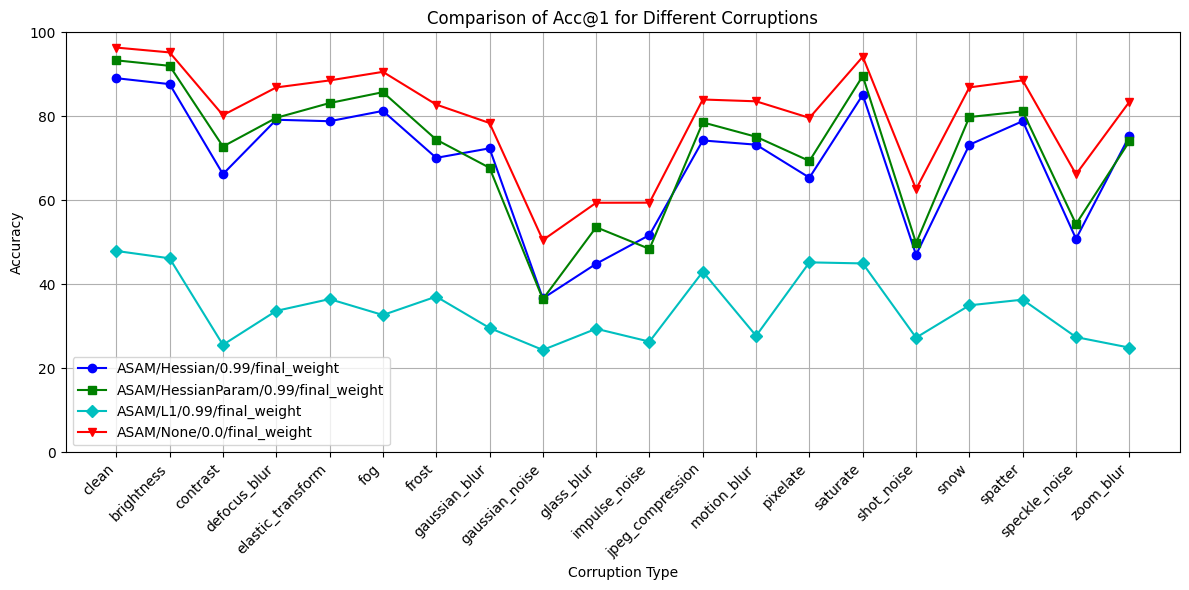

In [19]:
import matplotlib.pyplot as plt
import os
import glob
Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
# paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100', 'logs/debug/ResNet18/CIFAR10/None/0.0001/42/0.5/20250109151522/test/final_weight']
paths = sorted(glob.glob('../logs/ASAM/ResNet18/CIFAR10/*/0.1/42/0.99/*/test/final_weight'))
# paths.append('../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250209091815/test/final_weight')
paths.append('/home/ueno/pruning/test/logs/ASAM/ResNet18/CIFAR10/None/0.1/42/0.0/20250219102225/test/final_weight')
print(paths)
for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    # Acc1 = []
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))
Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
print(Acc1_dict)
# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
markars = ['o', 's', 'D', 'v', '^', '<', '>']
colors = ['b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])-1):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker=markars[i], label=(paths[i].split('/')[-10]+'/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1]), color=colors[i], linestyle='-')
y_values = [Acc1_dict[key][i+1] for key in x_labels]
plt.plot(x_labels, y_values, marker=markars[i+1], label=(paths[i+1].split('/')[-10]+'/'+paths[i+1].split('/')[-7]+'/'+paths[i+1].split('/')[-4]+'/'+paths[i+1].split('/')[-1]), color='r', linestyle='-')

plt.xlabel('Corruption Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Acc@1 for Different Corruptions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()

plt.savefig('corruption_comparison.png')
plt.show()

In [20]:
print(Acc1_dict)
acc_list = [0.0 for _ in range(Acc1_dict['clean'].__len__())]
for key in Acc1_dict.keys():
    if key == 'clean':
        continue
    for i in range(Acc1_dict[key].__len__()):
        acc_list[i] += Acc1_dict[key][i]
# 平均ほしい
acc_list = [acc / 19 for acc in acc_list]
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])):
    print('/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1], acc_list[i])

{'clean': [89.08, 93.33, 47.94, 96.37], 'brightness': [87.666, 92.028, 46.184, 95.218], 'contrast': [66.236, 72.808, 25.584, 80.274], 'defocus_blur': [79.184, 79.64, 33.666, 86.88], 'elastic_transform': [78.83, 83.16, 36.476, 88.546], 'fog': [81.29, 85.75, 32.682, 90.59], 'frost': [70.106, 74.45, 37.07, 82.802], 'gaussian_blur': [72.374, 67.746, 29.596, 78.408], 'gaussian_noise': [36.642, 36.468, 24.36, 50.522], 'glass_blur': [44.882, 53.584, 29.408, 59.412], 'impulse_noise': [51.724, 48.42, 26.34, 59.436], 'jpeg_compression': [74.252, 78.556, 42.992, 84.004], 'motion_blur': [73.244, 75.128, 27.722, 83.572], 'pixelate': [65.39, 69.36, 45.22, 79.63], 'saturate': [85.112, 89.606, 44.968, 94.186], 'shot_noise': [47.006, 49.796, 27.294, 62.656], 'snow': [73.226, 79.832, 34.992, 86.886], 'spatter': [78.858, 81.184, 36.338, 88.566], 'speckle_noise': [50.824, 54.334, 27.42, 66.194], 'zoom_blur': [75.292, 74.024, 24.918, 83.44]}
/Hessian/0.99/final_weight 68.00726315789473
/HessianParam/0.99/f